# Прогнозирование вероятности оттока клиентов сети фитнес-центров

Необходимо спрогнозировать вероятность оттока для каждого клиента сети фитнес-центров в следующем месяце, и сформировать с помощью кластеризации портреты пользователей.

Для этого следует проанализировать анкеты клиентов сети:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.

**Ход исследования:**

Данные из анкет клиентов мы получим из файла '/gym_churn.csv' 

О качестве данных ничего не известно. Поэтому перед проведением исследовательского анализа нам понадобится сделать их обзор. Мы проверим данные на ошибки и затем на этапе предобработки исправим критичные ошибки.

Таким образом, исследование пройдет в несколько этапов:

1. Изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

## Обзор данных
### Получение общей информации о данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import itertools
import warnings
warnings.filterwarnings("ignore")

Загрузим данные из анкет клиентов. Убедимся, что тип данных в каждой колонке правильный, а также отсутствуют пропущенные значения и дубликаты. 
Путь к файлу:

 *    /gym_churn.csv

In [2]:
# функция для первичного анализа датасета
def primary_analysis (data):
    display(data.head(5))
    display(data.info())
    display(data.describe())
    print('\nКоличество уникальных значений в столбцах:')
    print(data.nunique())
    print("\nКоличество явных дубликатов:", data.duplicated().sum())

data = pd.read_csv('/gym_churn.csv')
primary_analysis(data)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000



Количество уникальных значений в столбцах:
gender                                  2
Near_Location                           2
Partner                                 2
Promo_friends                           2
Phone                                   2
Contract_period                         3
Group_visits                            2
Age                                    23
Avg_additional_charges_total         4000
Month_to_end_contract                  12
Lifetime                               29
Avg_class_frequency_total            3913
Avg_class_frequency_current_month    3820
Churn                                   2
dtype: int64

Количество явных дубликатов: 0


Описание столбцов согласно документации к данным:
1. Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

**Вывод:** в датасете тип данных в столбце Month_to_end_contract' не соответствует описанию, пропущенные значения и явные дубликаты отсутствуют.  Доля оттока, равная 26,5%, говорит о дисбалансе классов в целевом признаке. Данные необходимо обработать до начала проведения исследовательского анализа.

## Предобработка данных

In [3]:
data.columns = [x.lower() for x in data.columns] # Откорректируем названия столбцов
data['month_to_end_contract'] = data['month_to_end_contract'].astype(int) # изменим тип данных столбца в соответствии с документацией
display(data.head(5))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


**Вывод:** данные готовы для исследователького анализа.

## Исследовательский анализ данных

### Средние значения признаков в группах

Найдем средние значения признаков в двух группах — тех, кто ушел в отток, и тех, кто остался:

In [4]:
# определим общее количество и долю ушедши клиентов
print('Всего из {:d} клиентов ушли {:d}, что составляет {:,.1%}.'.format(data.shape[0], data.churn.sum(), data.churn.mean()))

res_data = data.groupby('churn').mean().T
res_data.columns = ['stayed', 'left']
display(res_data)

Всего из 4000 клиентов ушли 1061, что составляет 26.5%.


,stayed,left
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод** 

На основании полученных средних значений признаков для двух групп можно сделать следующие выводы:
* promo_friends: среди постоянных клиентов в 2 раза больше тех, что использовал промо-код от знакомого при оплате первого абонемента;
* contract_period, month_to_end_contract: длительность текущего действующего абонемента, как и срок до окончания действующего абонемента, у постоянных клиентов в три с лишним раза больше, по сравнению с теми, кто ушел;
* group_visits: постоянные клиенты чаще посещяют групповые занятия;
* age: средний возраст постоянных клиентов от 30 лет, отказников - 27 лет;
* avg_additional_charges_total: постоянные клиенты тратят на другие услуги фитнес-центра на 37% больше, по сравение с отказниками;
* lifetime: время с момента первого обращения в фитнес-центр у постоянных кдиентов в 4.5 раза больше, по сравнению с ушедшими;
* avg_class_frequency_total и avg_class_frequency_current_month: у постоянных клиентов общая / средняя частота посещений в выше, в среднем, от 2 раз в неделю.

### Гистограммы и распределения признаков для групп

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался:

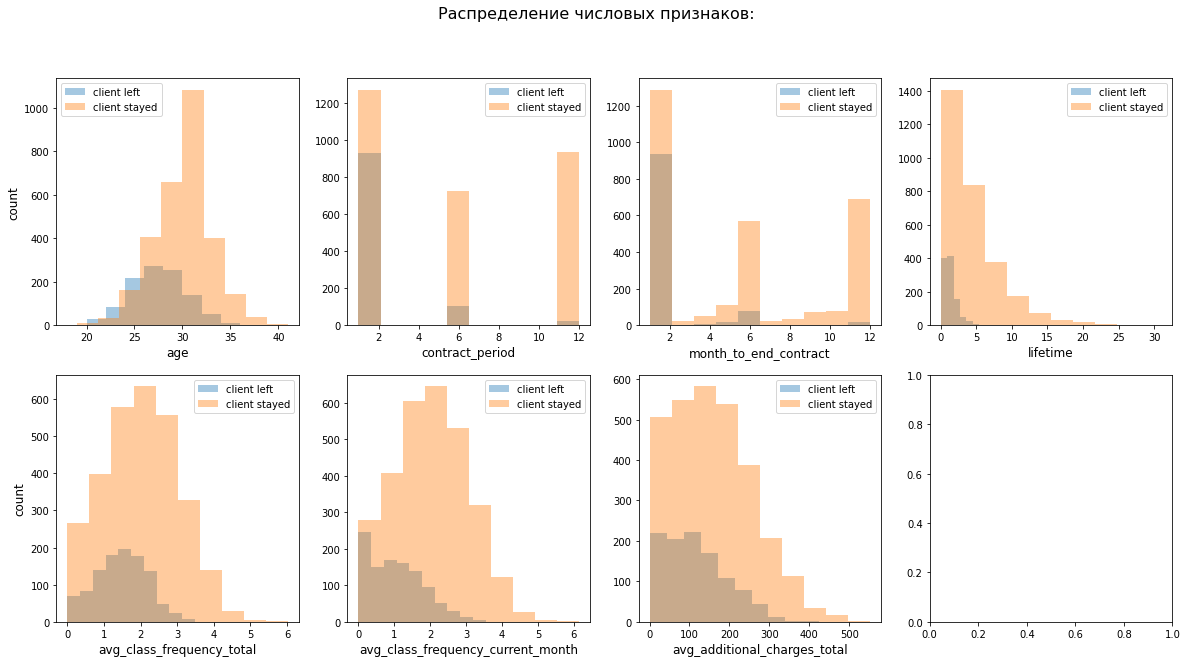

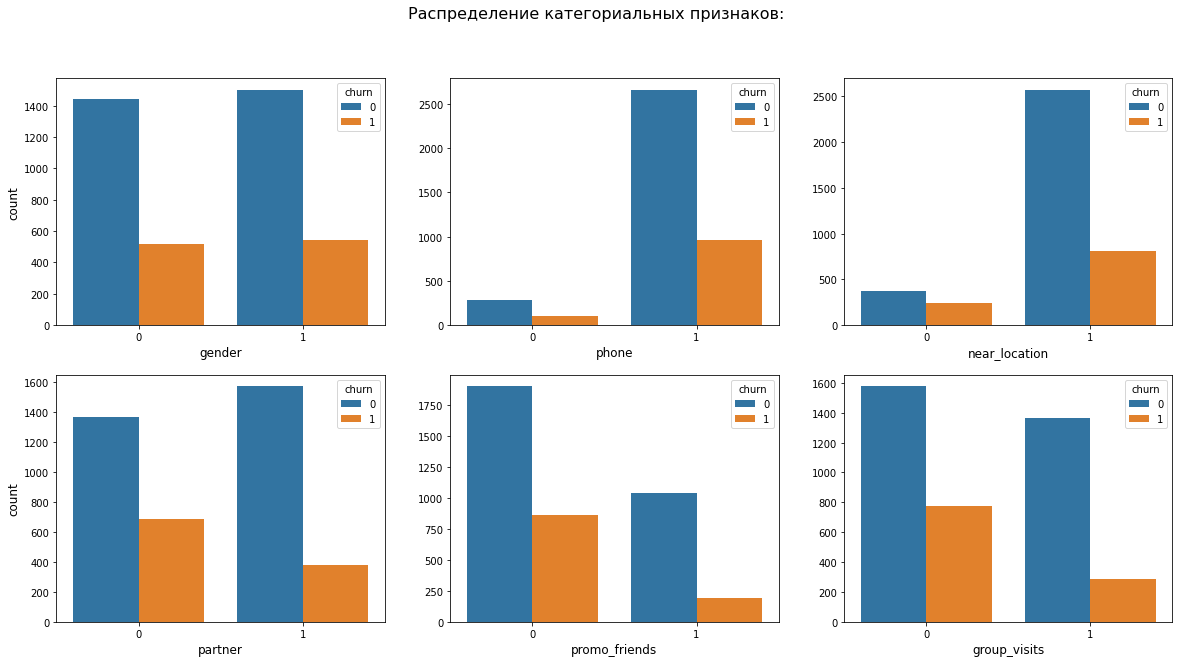

In [5]:
# числовые признаки
numeric_features = ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 
               'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']

# категориальные признаки
categorical_features = ['gender', 'phone', 'near_location', 'partner', 'promo_friends',
                        'group_visits']

# построим рспределение числовых признаков
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Распределение числовых признаков:', fontsize=16)
for n, x in enumerate(numeric_features):
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn==1')[x], bins=10, ax=ax, kde=False, label='client left')
    sns.distplot(data.query('churn==0')[x], bins=10, ax=ax, kde=False, label='client stayed')
    ax.set_xlabel(x, fontsize=12)
    if n % 4 == 0:
        ax.set_ylabel('сount', fontsize=12)
    else:
        ax.set_ylabel('')
    ax.legend();    
plt.show()
    
# построим столбчатые диаграммы для категориальных признаков  
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Распределение категориальных признаков:', fontsize=16)
for n, x in enumerate(categorical_features):
    ax = axes_list.pop(0)
    sns.countplot(data=data, ax=ax, x = data[x], hue='churn')
    ax.set_xlabel(x, fontsize=12)
    if n % 3 == 0:
        ax.set_ylabel('сount', fontsize=12)
    else:
        ax.set_ylabel('')
plt.show();

**Вывод** 

На основании графиков можно составить портрет постоянного клиента клуба: старше 30 лет, работает либо проживает поблизости, приобрел абонемент на 12 месяцев, приобретает дополнителные услуги, посещает клуб от 2 раза в неделю. 

Портрет вероятного отточника: моложе 30 лет, абоненмент на 1 месяц, не приобретает дополнительные услуги, общая частота посещений 1-2 раза в неделю, частота посещений за последний месяц менше 1 раза. 

### Матрица корреляции

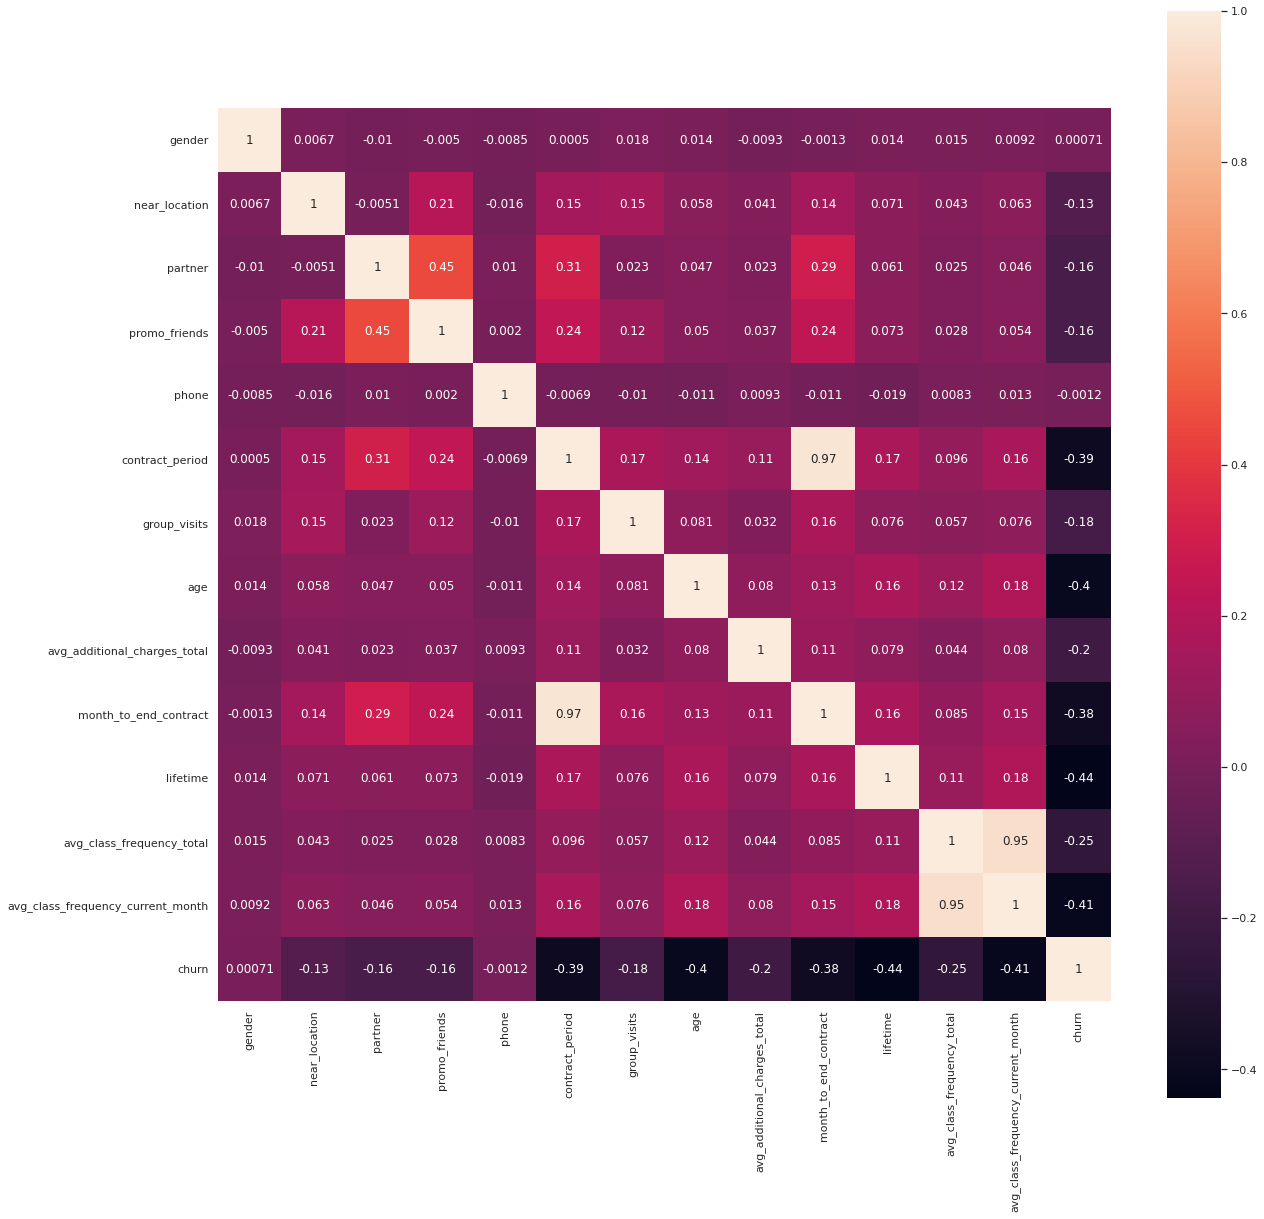

In [6]:
#вычисляем матрицу корреляций
cm = data.corr()
sns.set(rc={'figure.figsize':(20, 20)})
fig, ax = plt.subplots()

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(data=cm, annot=True, square=True)
plt.show();

**Вывод** 

Видно, что наибольшая корелляция с целевой переменной наблюдается у признаков *'lifetime', 'avg_class_frequency_current_month', 'age', 'contract_period' и 'month_to_enf_contract'*. Для всех случаев эта корелляция обратная со слабым влиянием на целевую переменную. Есть мультиколлинеарные признаки с корелляцией к целевой переменной близкой к 1: 'contract_period' и 'month_to_end_contract', 'avg_class_frequency_current_month' и 'avg_class_frequency_total'. Мультиколлинеарные признаки могут плохо влиять на обучение некоторых моделей. В этом случае по одному представителю из каждой пары признаков, по-хорошему, лучше удалить. Однако не будем этого делать, поскольку далее будем проводить обучение модели при помощи моделей логистической регрессией, для которой в sklearn дополнительно реализована регуляризация, которая не дает модели переобучиться, и модели случайного леса, которая устойчива к мультиколлинерности признкаов. 
Помимо этого у нас есть признаки с нулевой корреляцией с целевой переменной 'phone' и 'gender', которые вообще никак не влияют на отток.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.
Для этого необходимо разбить данные на обучающую и валидационную выборку.

In [7]:
X = data.drop('churn', axis=1) # датасет с признаками
y = data['churn']              # целевая перменная

# разобъем данные на обучающую и валидационную выборку; nак как в целевом признаке есть дисбаланс классов, 
# выборки лучше стратифицировать с помощью параметра stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучим scaler и трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

In [8]:
# список моделей
models = [
    LogisticRegression(solver='liblinear', random_state=1),
    RandomForestClassifier(random_state=1),
]

# функция 'make_prediction': принимает на вход модель и данные, выводит метрики accuracy, precision, recall, 
# а также важности признаков и возвращает прогноз 
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # выведите метрики для полученного прогноза
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score (y_test, y_pred)))
    print('Recall: {:.2f}\n'.format(recall_score(y_test, y_pred)))
      
    return y_pred

# найдем метрики по списку моделей
for i in models:
    print(str(i).partition('(')[0])
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression
Accuracy: 0.94
Precision: 0.90
Recall: 0.85

RandomForestClassifier
Accuracy: 0.92
Precision: 0.86
Recall: 0.82



**Вывод:** обе модели прогнозируют более 92% правильных ответов, у обеих точность свыше 86%, а доля обнаружения объектов '1' класса превышает 82%. Но результаты логистической регрессии чуть лучше, чем у случайного леса.   

## Кластеризация клиентов

### Стандартизация данных

Проведем кластеризацию клиентов, для этого сначала стандартизируем данные:

In [9]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
#X_sc[:1]

### Матрица расстояний и дендрограмма

Построим матрицу расстояний на стандартизованной матрице признаков и отобразим дендрограмму:

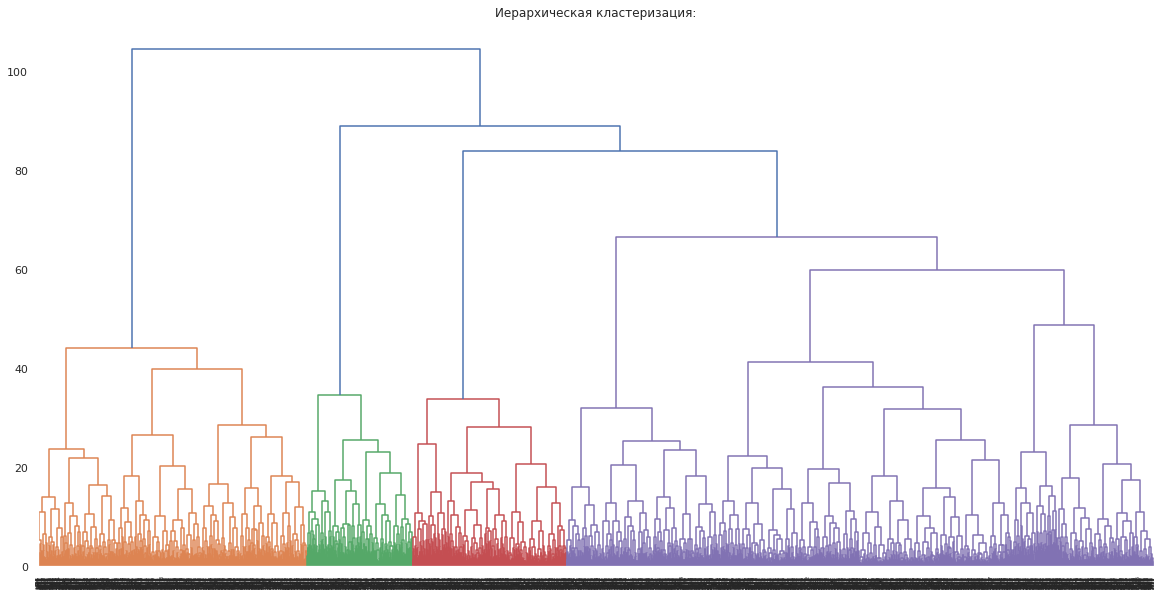

In [10]:
# получим таблицу «связок» 
linked = linkage(X_sc, method = 'ward')

# визуализируем таблицу «связок» между объектами как дендрограмму
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация:')
plt.show()

**Вывод:** на основании полученного графика можно предположить деление на 4-6 кластеров, для дальнейшего изучения возьмем количество кластеров, равное 5.

### Модель кластеризации и прогнозирование кластеров клиентов

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [11]:
# зададим модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=3)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# сохраним метки кластера в поле датасета
data['cluster_km'] = labels

### Средние значения признаков для кластеров

Проанализируем средние значения признаков для кластеров:

In [12]:
display(data.groupby('cluster_km').mean().T)

cluster_km,0,1,2,3,4
gender,0.523316,0.484921,0.493569,0.563006,0.500577
near_location,0.862694,0.725397,0.948553,0.846243,0.936563
partner,0.471503,0.293651,0.813505,0.285549,0.740484
promo_friends,0.305699,0.011111,0.998392,0.073988,0.480969
phone,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4.777202,1.922222,3.020900,2.682081,11.833910
group_visits,0.427461,0.279365,0.437299,0.445087,0.547866
age,29.297927,28.135714,29.051447,30.047399,29.891580
avg_additional_charges_total,144.208179,129.444222,141.358831,161.246121,163.330735
month_to_end_contract,4.466321,1.829365,2.829582,2.480925,10.791234


Оценим для нашей кластеризации численность кластеров и метрику силуэта, оценивающую качество кластеризации:

In [13]:
print(data['cluster_km'].value_counts())
print('\nSilhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

1    1260
4     867
3     865
2     622
0     386
Name: cluster_km, dtype: int64

Silhouette_score: 0.13


Метрика силуэта 0.13 характеризует низкое качество кластеризации.

**Вывод:** метрика силуэта 0.13 характеризует низкое качество кластеризации. Самым многочисленным является Кластер 1, самый малочисленный - Кластер 0. 

Признаки кластеров (Кластер 3 и 4) с наименьшим показателем оттока клиентов: 
* по половому признаку распределены примерно поровну; 
* клиенты, в основном, живут недалеко от клуба; 
* часто приходят в клуб по партнерской акции или приглашению друзей;
* почти в половине случаев посещают групповые занятия;
* возраст около 30 лет;
* средняя частота посещений составляет 2 и более раз в неделю;
* средняя суммарная выручка от других услуг фитнес-центра равна 161.

Признаки кластера (Кластер 1) с наибольшим показателем оттока клиентов: 
* по половому признаку распределены поровну; 
* клиенты, в основном, живут нв удалении от клуба, 
* редко приходят в клуб по партнерской акции или приглашению друзей;
* предпчитают одиночные занятия;
* возраст около 28 лет и старше.
* средняя частота посещений составляет 1 раз в неделю;
* средняя суммарная выручка от других услуг фитнес-центра не превышает 130.

### Распределения признаков для кластеров

Построим распределения признаков для кластеров:

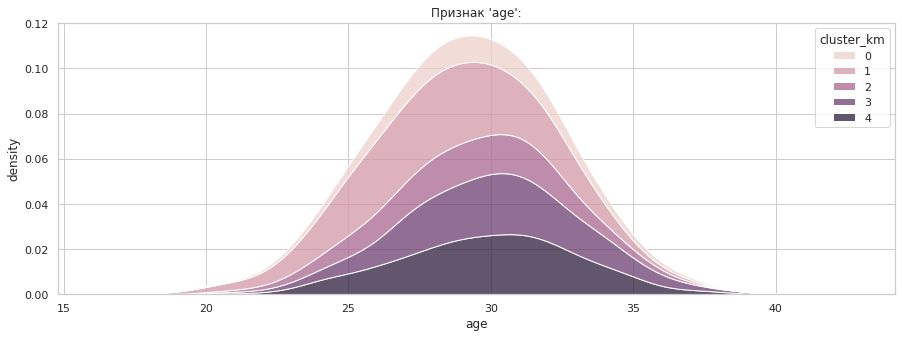

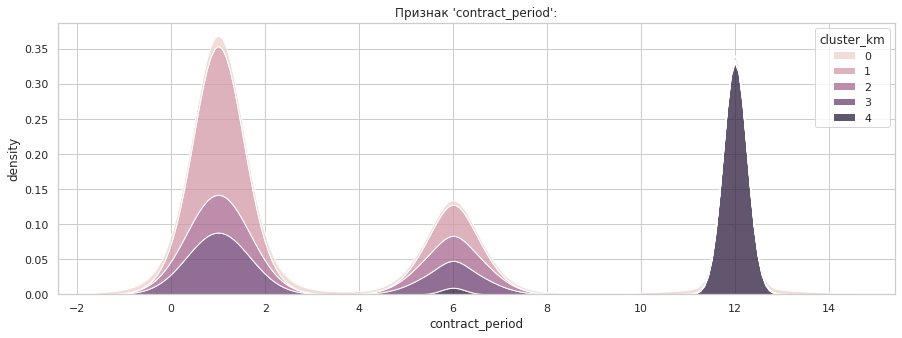

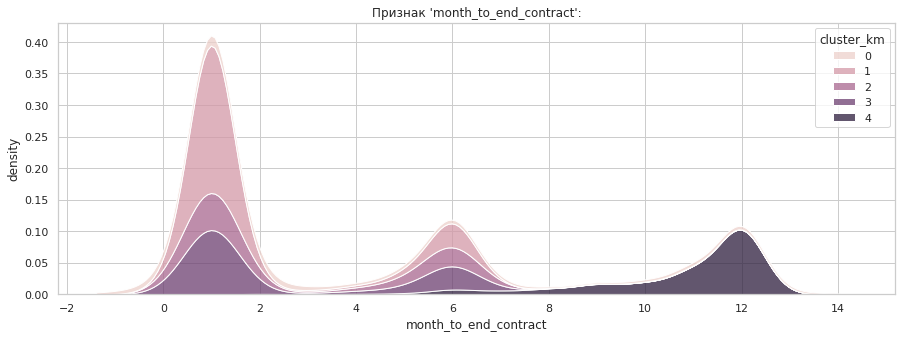

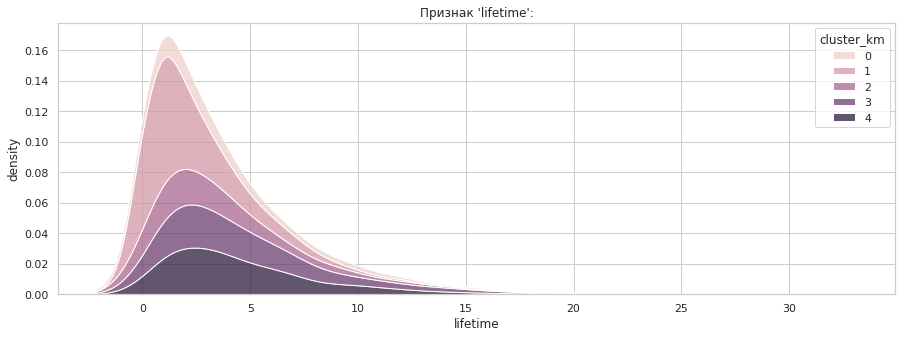

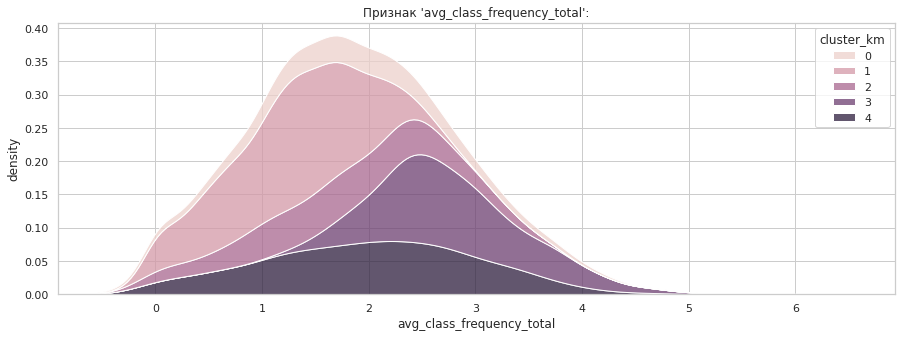

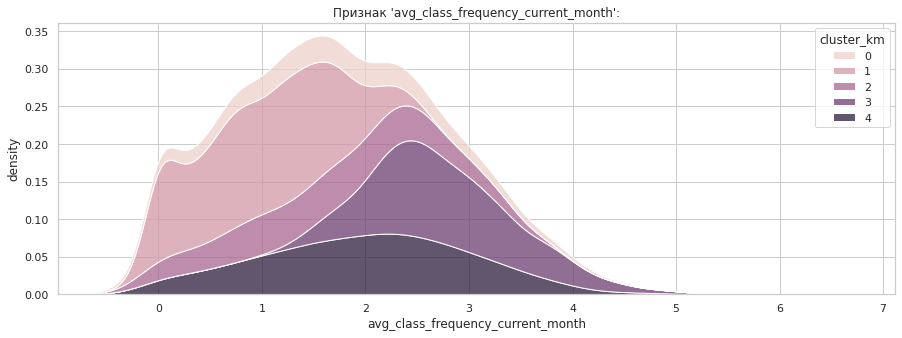

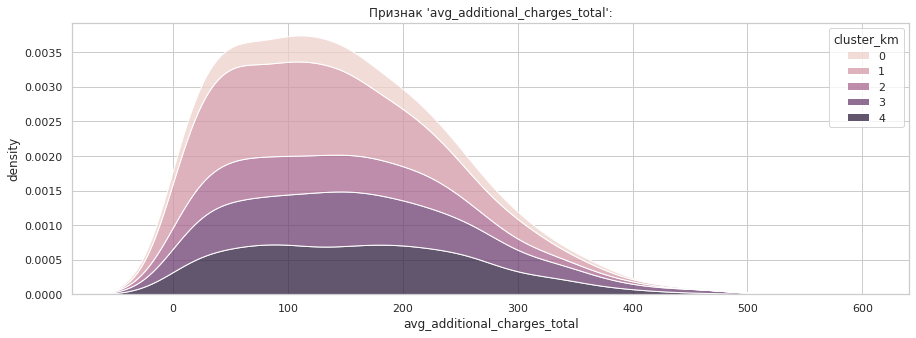

In [14]:
#распределение числовых признаков по кластерам
for feature in numeric_features:
    plt.figure(figsize=(15, 5))
    sns.set_style('whitegrid')
    sns.kdeplot(data=data, x=data[feature], hue="cluster_km", multiple="stack")
    plt.title('Признак \''+ feature + '\':')
    plt.ylabel('density')
    plt.show();

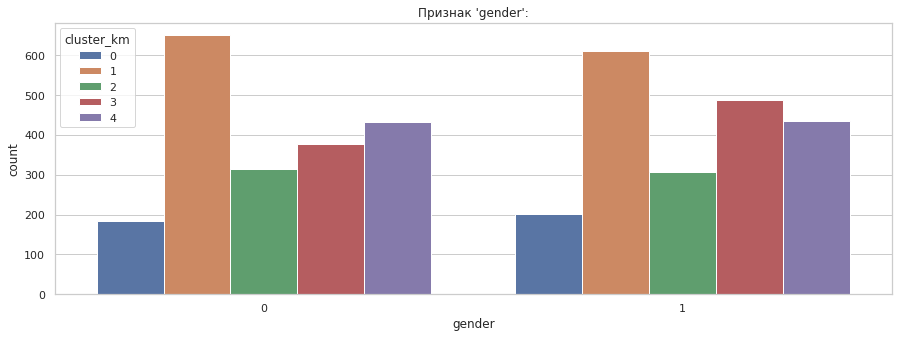

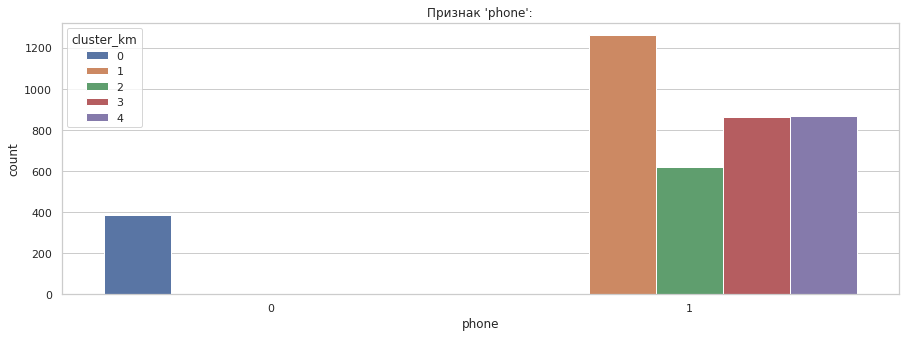

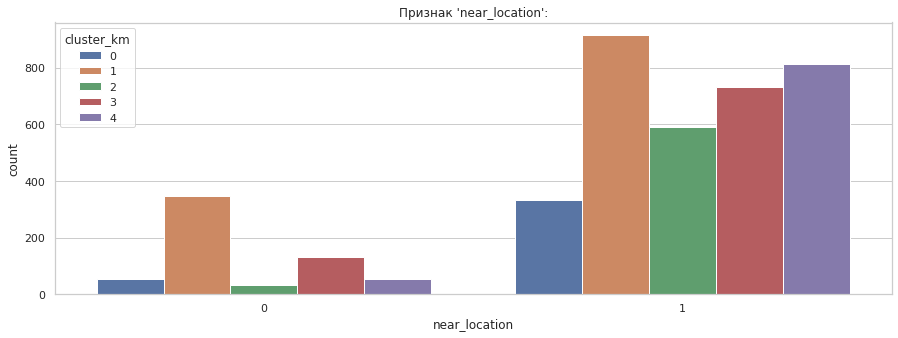

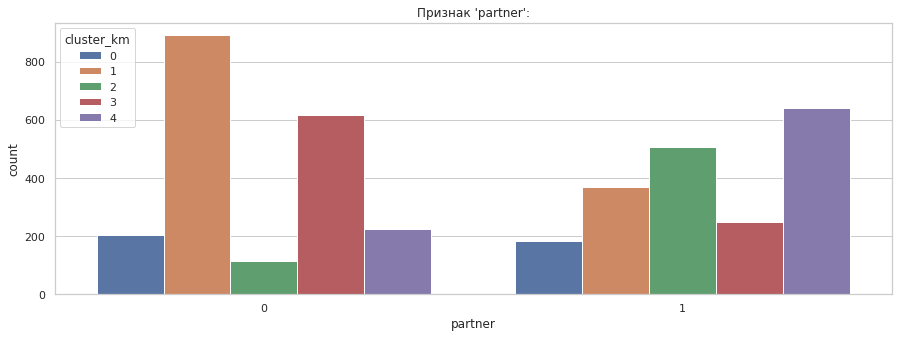

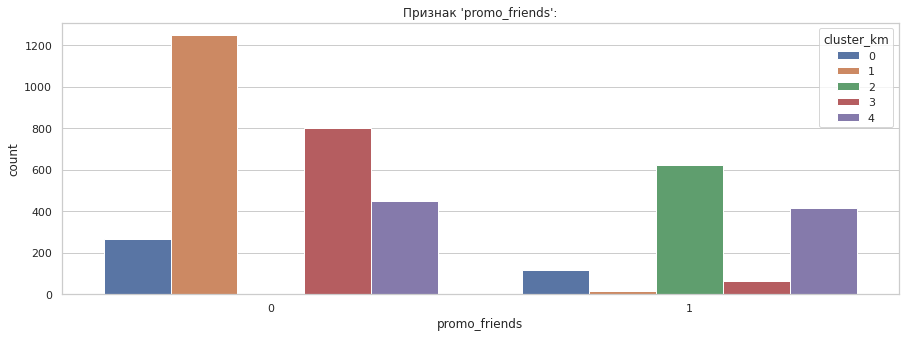

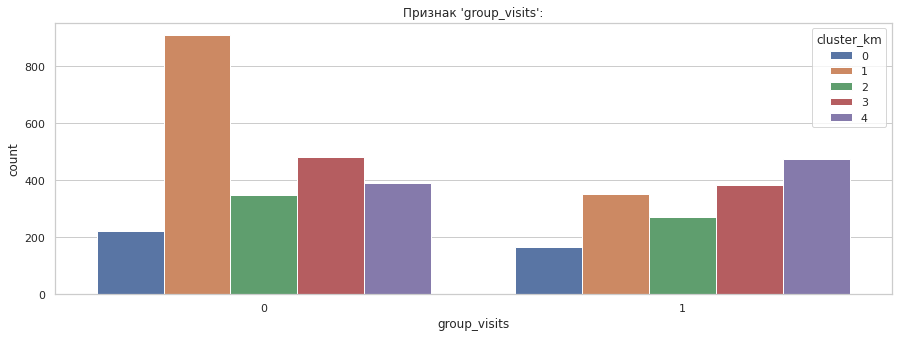

In [15]:
#распределение категориальных призгаков по кластерам
for feature in categorical_features:
    plt.figure(figsize=(15, 5))
    sns.set_style('whitegrid')
    sns.countplot(x=data[feature], hue="cluster_km", data=data)
    plt.title('Признак \''+ feature + '\':')
    plt.ylabel('сount')
    plt.show();

**Вывод**

Признаки, выделенные выше для Кластера 1, 3 и 4, подтверждаются графиками:

* Кластер 0: мужчины и женщины, возраст 29 лет, живут рядом с клубом, в половине случае приходят по партнерской акции, иногда по приглашению друзей, абонемент на 5 месяцев, иногда посещают групповые занятия, приходят в клуб 1-2 раза в неделю, средняя суммарная выручка от других услуг фитнес-центра равна 144;
* Кластер 1: мужчины и женщины, возраст 28 лет, живут нв удалении от клуба, редко приходят по партнерской акции или приглашению друзей, абонемент на 2 месяца, предпочитают одиночные тренировки, приходят в клуб 1 раз в неделю, суммарная выручка от других услуг фитнес-центра не превышает 130;
* Кластер 2: мужчины и женщины, возраст 29 лет, живут рядом с клубом, приходят в клуб по приглашению друзей, либо по партнерской акции, абонемент на 3 месяца, в половине случаев посещают групповые занятия, приходят в клуб 1-2 раза в неделю, средняя суммарная выручка от других услуг фитнес-центра равна 141;
* Кластер 3: мужчины и женщины, возраст 30+ лет, живут рядос с клубом, часто приходят в клуб по партнерской акции или приглашению друзей, абонемент на 3 месяца, в половине случаев посещают групповые занятия, приходят в клуб 2 и более раз в неделю, средняя суммарная выручка от других услуг фитнес-центра равна 161;
* Кластер 4: мужчины и женщины, возраст 30 лет, живут рядом с клубом, часто приходят в клуб по партнерской акции или приглашению друзей, абонемент на 12 месяцев, часто посещают групповые занятия, приходят в клуб 2 раза в неделю, средняя суммарная выручка от других услуг фитнес-центра равна 163.

### Доля оттока для кластеров

Посчитаем долю оттока для каждого полученного кластера:

In [16]:
outflow = data.groupby('cluster_km')['churn'].agg(['count', 'mean']).sort_values(by='mean', ascending=False).reset_index()
outflow.columns = ['cluster', 'clients_count', 'share']
display(outflow)

,cluster,clients_count,share
0,1,1260,0.561905
1,0,386,0.266839
2,2,622,0.262058
3,3,865,0.078613
4,4,867,0.021915


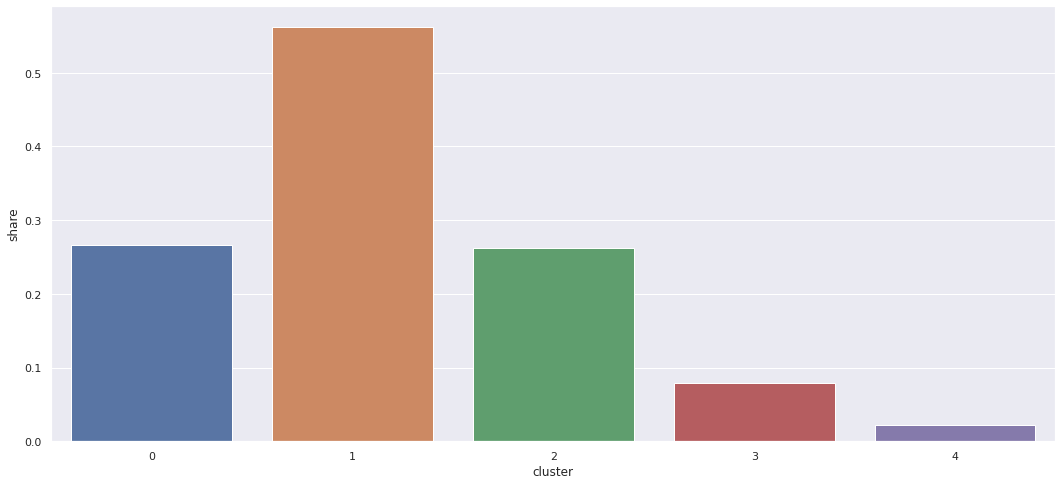

In [18]:
sns.set(rc={'figure.figsize':(18, 8)})
sns.barplot(data=outflow, x='cluster', y="share")
fig.show();

**Вывод** 

Кластеры отличаются по доле оттока: 
* Самым надежным является Кластер 4 (2.2% или 1,84% от общего количества) и Кластер 3 (7.9% или 6.6% от общего количества);
* Наиболее подвержены оттоку Кластер 1 (56.2% или от 47.2% от общего количества).

## Общий вывод

Для прогнозирования вероятности оттока клиентов сети фитнес-центров в следующем месяце и формирования портретов пользователей мы использовали входные данные из анкет клиентов.

Данные были проверены на наличие ошибок и оценки их влияния на исследование; была выполнена предобработка данных, которая в себя включала поиск пропущенных значений и обработку ошибок.

После этого был проведен исследовательский анализ данных и получены следующие результаты.

**1. ЦЕЛЕВЫЕ ГРУППЫ КЛИЕНТОВ**

**Портрет клиента в зоне риска:** мужчина или женщина, возраст 28 лет, живет нв удалении от клуба, редко приходит по партнерской акции или приглашению друзей, абонемент на 2 месяца, предпочитает одиночные тренировки, посещает клуб 1 раз в неделю, суммарная выручка от других услуг фитнес-центра не превышает 130;

**Портрет постоянного клиента:** мужчина или женщина, возраст 30 лет, живет рядом с клубом, часто приходит в клуб по партнерской акции или приглашению друзей, абонемент на 12 месяцев, любит групповые занятия, приходят в клуб 2 раза в неделю, средняя суммарная выручка от других услуг фитнес-центра равна 163.

Причины оттока могут быть связаны с высокой конкуренцией на рынке, отсутствием мотивации у клиентов, с внутренними проблемами фитнес-центра (тренерский состав, ассортимент услуг, спортивное оборудование, состояние и качество ремонта помещений, качество уборки, внимательность персонала и т.д.). 

Для повышения качества работы с клиентами и их удержания предлагается ряд мер по выявлению клиентов, находящихся в зоне риска:

**2. МЕРЫ ПО СНИЖЕНИЮ ОТТОКА:**

**2.1. Идентификация причин оттока** 

Самый действенный способ определить причины лояльности одних пользователей и снижения мотивации у других - спросить у самих клиентов, что им нравится / не нравится в клубах. Для этого можно организовать регулярные опросы клиентов при помощи анкет. Цель анкетирования - выяснить основные причины оттока, разработать соответсвуюший план действий для удержания клиентов и воплотить его в жизнь.

**2.2. Проактивные действия по выявлению демотивированных клиентов**

Реализовать инструмент для автоматизированного отчета, который по итогу каждого месяца позволит выявить клиентов, находящихся  в зоне риска, тех, кто посетил фитнес центр не более одного раза за прошедший месяц. Необходимо проанализировать обратную связь, полученную от этих клиентов за счет анкетирования. На основе нее предложить им дополнительные стимулы, специальные акции для их удержания. 

**3. ДРУГИЕ ОСОБЕННОСТИ ВЗАИМОДЕЙТВИЯ С КЛИЕНТАМИ**

Дополнительные инструменты, направленные на развитие бизнеса нашей сети фитнес клубов, рекомендуются для реализации: 

**3.1. Увеличение средней длительности абонемента** (=срока жизни клиента) у постоянных клиентов за счет дополнительных бонусов / кешбека при покупке абоненмента на большой срок.

**3.2. Ежемесчное таргетированное рекламное предложение** для жителей жилых кварталов, работников бизнес-центров, расположенных рядом с фитнес центром с целью увеличения базы постоянных клиентов.